In [6]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import os

In [7]:


# Path to the main data directory
data_dir = '/kaggle/input/image-am/labeled'

image_paths = []
labels = []

for label in os.listdir(data_dir):
    # Get the path to the category folder
    category_dir = os.path.join(data_dir, label)
    
    # Ensure we're looking at a directory (to avoid files)
    if os.path.isdir(category_dir):
        # Loop through each image file in the category folder
        for image_file in os.listdir(category_dir):
            # Get the full path to the image
            image_path = os.path.join(category_dir, image_file)
            
            # Append the image path and label to our lists
            image_paths.append(image_path)
            labels.append(label)

# Create a DataFrame
df = pd.DataFrame({
    'Image_Path': image_paths,
    'AM_Class': labels
})

print(df.head(5))


                                          Image_Path AM_Class
0  /kaggle/input/image-am/labeled/Empty/(531)_sli...    Empty
1  /kaggle/input/image-am/labeled/Empty/(797)_sli...    Empty
2  /kaggle/input/image-am/labeled/Empty/(1510)_sl...    Empty
3  /kaggle/input/image-am/labeled/Empty/(973)_sli...    Empty
4  /kaggle/input/image-am/labeled/Empty/(1439)_sl...    Empty


In [8]:
am_dict = {
    'Empty': 0,
    'OK': 1,
    'Over': 2,
    'Under': 3,
}

df['am_id'] = df['AM_Class'].map(am_dict)

# Checking the unique values and their counts
print(df['AM_Class'].unique())
print(df['AM_Class'].value_counts())


['Empty' 'OK' 'Under' 'Over']
AM_Class
Under    14726
OK       13228
Over     12268
Empty     3179
Name: count, dtype: int64


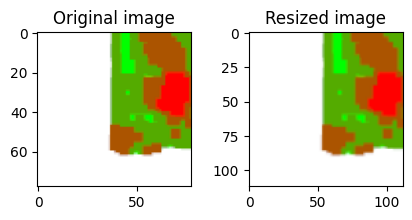

In [9]:
fname_images = np.array(df['Image_Path'])
file_to_read ='/kaggle/input/image-am/labeled/Over/(10)_slice_10_1.png'
import cv2
#from cv2 import imread, resize
from cv2 import imread, resize
import cv2

SIZE = 112
 
img = imread(file_to_read)
img2 = resize(img,(112,112))

plt.figure(figsize=(5,2))
plt.subplot(1,2,1)
plt.imshow(img[:,:,::-1])
plt.title('Original image')
plt.subplot(1,2,2)
plt.imshow(img2[:,:,::-1])
plt.title('Resized image')
plt.show()

In [10]:
import os
import numpy as np
from skimage.io import imread
from skimage.transform import resize

X = []
y = []

# Lists of images in each category
lista1 = os.listdir('/kaggle/input/image-am/labeled/Empty/')
lista2 = os.listdir('/kaggle/input/image-am/labeled/OK/')
lista3 = os.listdir('/kaggle/input/image-am/labeled/Over/')
lista4 = os.listdir('/kaggle/input/image-am/labeled/Under/')

# Extract just the file names from the paths in df['Image_Path']
df['File_Name'] = df['Image_Path'].apply(lambda x: os.path.basename(x))

# Processing the images in 'Empty' category
for i in range(len(lista1)):
    fname_image = lista1[i]  # This is the file name

    # Construct the full file path
    file_to_read = '/kaggle/input/image-am/labeled/Empty/' + str(fname_image)
    
    
    # Read and resize the image
    img = imread(file_to_read)
    img2 = resize(img, (SIZE, SIZE))
    X.append(img2)
    
    # Check if the file name exists in the DataFrame
    filtered_df = df[df['File_Name'] == fname_image]
    
    output = np.array(filtered_df.am_id)
    y.append(output[0])
    if i % 3000 == 0:
        print(i, 'images loaded')

        
# Processing the images in 'ok' category
for i in range(len(lista2)):
    fname_image = lista2[i]  # This is the file name

    # Construct the full file path
    file_to_read = '/kaggle/input/image-am/labeled/OK/' + str(fname_image)
    
    # Read and resize the image
    img = imread(file_to_read)
    img2 = resize(img, (SIZE, SIZE))
    X.append(img2)
    
    # Check if the file name exists in the DataFrame
    filtered_df = df[df['File_Name'] == fname_image]
    output = np.array(filtered_df.am_id)
    y.append(output[0])
    
    if i % 10000 == 0:
        print(i, 'images loaded')
        
# Processing the images in 'Over' category
for i in range(len(lista3)):
    fname_image = lista3[i]  # This is the file name

    # Construct the full file path
    file_to_read = '/kaggle/input/image-am/labeled/Over/' + str(fname_image)

    # Read and resize the image
    img = imread(file_to_read)
    img2 = resize(img, (SIZE, SIZE))
    X.append(img2)
    
    # Check if the file name exists in the DataFrame
    filtered_df = df[df['File_Name'] == fname_image]
    
    output = np.array(filtered_df.am_id)
    y.append(output[0])
    
    if i % 10000 == 0:
        print(i, 'images loaded')
        
# Processing the images in 'Under' category
for i in range(len(lista4)):
    fname_image = lista4[i]  # This is the file name

    # Construct the full file path
    file_to_read = '/kaggle/input/image-am/labeled/Under/' + str(fname_image)
    
    # Read and resize the image
    img = imread(file_to_read)
    img2 = resize(img, (SIZE, SIZE))
    X.append(img2)
    
    # Check if the file name exists in the DataFrame
    filtered_df = df[df['File_Name'] == fname_image]
    
    output = np.array(filtered_df.am_id)
    y.append(output[0])
   
    if i % 10000 == 0:
        print(i, 'images loaded')
        

0 images loaded
3000 images loaded
0 images loaded
10000 images loaded
0 images loaded
10000 images loaded
0 images loaded
10000 images loaded


In [ ]:
import numpy as np

from tensorflow.keras.utils import to_categorical


X = np.array(X)
y = np.array(y)

y_train = to_categorical(y, num_classes=4)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_train, test_size=0.20, random_state=42,stratify=y)

In [ ]:
X.shape

In [ ]:
from sklearn.utils.class_weight import compute_class_weight

y_id = np.array(df['am_id'])


class_weights = np.around(compute_class_weight(class_weight='balanced',classes=np.unique(y_id),y=y),2)
class_weights = dict(zip(np.unique(y_id),class_weights))

print(class_weights)

In [ ]:
import tensorflow as tf
from keras import layers
from keras.optimizers import Adam

SIZE = 112

pre_trained_model = tf.keras.applications.EfficientNetB7(include_top=False,
                                                      input_shape=(SIZE, SIZE, 3),
                                                      weights='imagenet')

# Freeze the first layer and make the rest trainable
for layer in pre_trained_model.layers[:-1]:
    layer.trainable = False
for layer in pre_trained_model.layers[1:]:
    layer.trainable = True

# Build the final model by adding your custom layers
model = tf.keras.models.Sequential([
    pre_trained_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(6, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# Print a summary of the model architecture
model.summary()

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
#from tensorflow.keras.callbacks import EarlyStopping

batch_size = 16
epochs = 80
optimizer = Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-3)
metrics = [tf.keras.metrics.AUC(),tf.keras.metrics.Precision() , tf.keras.metrics.Recall()]
model.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics=['accuracy' , metrics])

datagen = ImageDataGenerator(zoom_range = 0.2, horizontal_flip=True, shear_range=0.2)

datagen.fit(X_train)

history=model.fit(datagen.flow(X_train,y_train), epochs=epochs, batch_size=batch_size, shuffle=True, validation_data=(X_test, y_test), class_weight=class_weights)

# Define the EarlyStopping callback
#early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
#history = model.fit(datagen.flow(X_train, y_train),
#epochs=epochs,
#batch_size=batch_size,
#shuffle=True,
#validation_data=(X_test, y_test),
#class_weight=class_weights,
#callbacks=[early_stopping])

In [ ]:
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred , axis = 1)
print(y_pred_labels)

In [ ]:
y_pred_df=pd.DataFrame(data=y_pred_labels,columns=['predicted'])
y_pred_df.to_csv('EfficientNetb7_80.csv')

In [ ]:
from sklearn.metrics import f1_score
import numpy as np

# Convert the one-hot encoded true labels to class labels
y_true_labels = np.argmax(y_test, axis=1)

# Calculate the F1 score
f1_score_value = f1_score(y_true_labels, y_pred_labels, average='weighted')
print("F1 Score:", f1_score_value)

# Assuming you have the predicted labels and true labels
# y_pred_labels and y_true_labels

# Calculate True Positives (TP)
TP = np.sum((y_pred_labels == 1) & (y_true_labels == 1))

# Calculate True Negatives (TN)
TN = np.sum((y_pred_labels == 0) & (y_true_labels == 0))

# Calculate False Positives (FP)
FP = np.sum((y_pred_labels == 1) & (y_true_labels == 0))

# Calculate False Negatives (FN)
FN = np.sum((y_pred_labels == 0) & (y_true_labels == 1))

# Calculate Sensitivity (Recall)
sensitivity = TP / (TP + FN)

# Calculate Specificity
specificity = TN / (TN + FP)

print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)

In [ ]:
training_accuracy = history.history['accuracy']
print("Training Accuracy:", training_accuracy)